# Compare pebble isolation mass with Super-Earth mass

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from util import *

In [2]:
data_CKS = pickle.load(open('./data/CKS.pkl','rb'))

In [3]:
m_solar = np.array([0.0553, 0.815, 1, 0.107, 317.8, 95.2, 14.5, 17.1])*Mearth
a_solar = np.array([0.387, 0.723, 1, 1.52, 5.20, 9.57, 19.17, 30.18])
q_solar = m_solar[:4]/Msun # inner solar system

m_trappist = np.array([1.374, 1.308, 0.388, 0.692, 1.039, 1.321, 0.326])*Mearth
a_trappist = np.array([0.01154, 0.01580, 0.02227, 0.02925, 0.03849, 0.04683, 0.06189])
q_trappist = m_trappist/(0.0898*Msun)

In [4]:
def plot_q(data, **kwargs):
    n = len(data['system'])
    if n <= 1:
        return None
    I = np.argsort(data['a_p_au'])
    q = (data['m_p_mearth']/data['m_star_msun'])[I] * Mearth/Msun
    x = data['a_p_au'][I]
    plt.plot(x, q, **kwargs)
    return None

def plot_q_one_system(m, mstar, a, **kwargs):
    I = np.argsort(a)
    m = m[I]
    a = a[I]
    q = m/mstar
    x = a/np.mean(a)
    plt.plot(x, q, **kwargs)

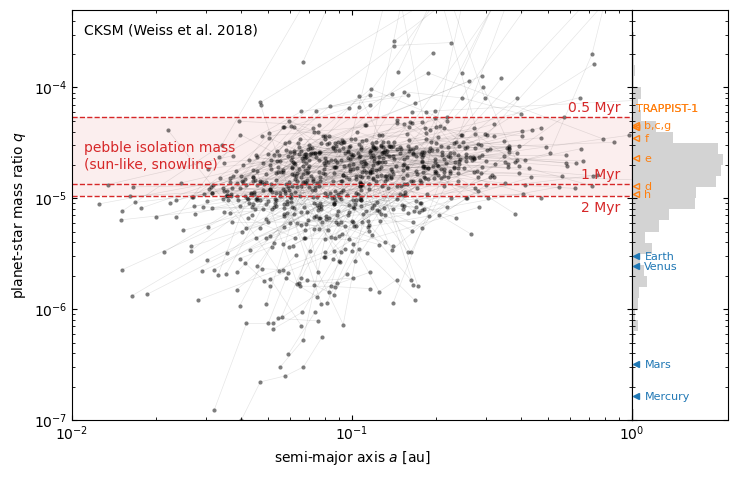

In [5]:
fig = plt.figure(figsize=(8,5))

ax = fig.add_axes([0.13,0.13,0.7,0.82])
plt.sca(ax)

_ = process_data(data_CKS, plot_q, color='k', lw=.5, alpha=.1)
_ = process_data(data_CKS, plot_q, marker='o', mew=0, ms=3, mfc='k', alpha=.5, ls='')
plt.yscale('log')
plt.ylim(1e-7,5e-4)
plt.ylabel(r'planet-star mass ratio $q$')
plt.xscale('log')
plt.xlim(1e-2,1)
plt.xlabel(r'semi-major axis $a$ [au]')
plt.gca().tick_params(right=True,top=True,which='both',direction='in')

q_mid = 4.5*Mearth/Msun # read from Bitsch 2019 Fig 1
q_lo = 3.5*Mearth/Msun # read from Bitsch 2019 Fig 1
q_hi = 18*Mearth/Msun # read from Bitsch 2019 Fig 1
plt.plot(plt.xlim(),[q_lo, q_lo],'tab:red',ls='--',lw=1)
plt.plot(plt.xlim(),[q_mid, q_mid],'tab:red',ls='--',lw=1)
plt.plot(plt.xlim(),[q_hi, q_hi],'tab:red',ls='--',lw=1)
plt.text(plt.xlim()[0]*1.1,np.sqrt(q_hi*q_lo),'pebble isolation mass\n(sun-like, snowline)', color='tab:red',zorder=999, fontsize=10, va='center')
plt.fill_between(plt.xlim(), [q_lo, q_lo], [q_hi, q_hi], color='tab:red', alpha=.08, lw=0)
plt.text(plt.xlim()[1]/1.1,q_hi*1.1,'0.5 Myr',color='tab:red', fontsize=10, ha='right')
plt.text(plt.xlim()[1]/1.1,q_mid*1.1,'1 Myr',color='tab:red', fontsize=10, ha='right')
plt.text(plt.xlim()[1]/1.1,q_lo/1.1,'2 Myr',color='tab:red', fontsize=10, ha='right', va='top')

plt.text(plt.xlim()[0]*1.1, 3e-4, 'CKSM (Weiss et al. 2018)', fontsize=10)

ax = fig.add_axes([0.83,0.13,0.12,0.82])
plt.sca(ax)
plt.xticks([])
plt.yscale('log')
plt.ylim(1e-7,5e-4)
plt.gca().tick_params(right=True,top=True,which='both',direction='in')
plt.gca().set_yticklabels([])

q = data_CKS['m_p_mearth']*Mearth/data_CKS['m_star_msun']/Msun
bins = np.logspace(-7,-2,5*10+1)
plt.hist(q, bins=bins, orientation='horizontal', color='lightgrey', histtype='stepfilled')

plt.plot(np.ones_like(q_solar)*5, q_solar, marker='<', ls='', ms=5, color='tab:blue')

for q, name in zip(q_solar, ['Mercury','Venus','Earth','Mars']):
    plt.text(15, q/1.02, name, va='center', ha='left', color='tab:blue', fontsize=8)
    
plt.text(5, 6e-5, 'TRAPPIST-1', color='tab:orange', fontsize=8)

plt.plot(np.ones_like(q_trappist)*5, q_trappist, marker='<', ls='', ms=5, color='tab:orange', mfc='None')

for q, name in zip(q_trappist, ['b,c,g',' ','d','e','f',' ','h']):
    plt.text(15, q/1.02, name, va='center', ha='left', color='tab:orange', fontsize=8)
    
plt.text(5, 6e-5, 'TRAPPIST-1', color='tab:orange', fontsize=8)

#plt.savefig('figures/superearth.pdf')
plt.show()

## Same figure, but with Weiss+2018 mass-radius relation

In [6]:
data_CKS = pickle.load(open('./data/CKS_W18.pkl','rb'))

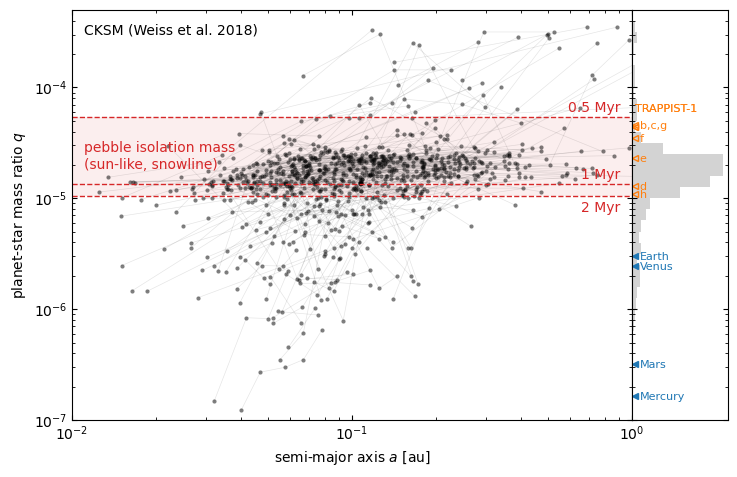

In [7]:
fig = plt.figure(figsize=(8,5))

ax = fig.add_axes([0.13,0.13,0.7,0.82])
plt.sca(ax)

_ = process_data(data_CKS, plot_q, color='k', lw=.5, alpha=.1)
_ = process_data(data_CKS, plot_q, marker='o', mew=0, ms=3, mfc='k', alpha=.5, ls='')
plt.yscale('log')
plt.ylim(1e-7,5e-4)
plt.ylabel(r'planet-star mass ratio $q$')
plt.xscale('log')
plt.xlim(1e-2,1)
plt.xlabel(r'semi-major axis $a$ [au]')
plt.gca().tick_params(right=True,top=True,which='both',direction='in')

q_mid = 4.5*Mearth/Msun # read from Bitsch 2019 Fig 1
q_lo = 3.5*Mearth/Msun # read from Bitsch 2019 Fig 1
q_hi = 18*Mearth/Msun # read from Bitsch 2019 Fig 1
plt.plot(plt.xlim(),[q_lo, q_lo],'tab:red',ls='--',lw=1)
plt.plot(plt.xlim(),[q_mid, q_mid],'tab:red',ls='--',lw=1)
plt.plot(plt.xlim(),[q_hi, q_hi],'tab:red',ls='--',lw=1)
plt.text(plt.xlim()[0]*1.1,np.sqrt(q_hi*q_lo),'pebble isolation mass\n(sun-like, snowline)', color='tab:red',zorder=999, fontsize=10, va='center')
plt.fill_between(plt.xlim(), [q_lo, q_lo], [q_hi, q_hi], color='tab:red', alpha=.08, lw=0)
plt.text(plt.xlim()[1]/1.1,q_hi*1.1,'0.5 Myr',color='tab:red', fontsize=10, ha='right')
plt.text(plt.xlim()[1]/1.1,q_mid*1.1,'1 Myr',color='tab:red', fontsize=10, ha='right')
plt.text(plt.xlim()[1]/1.1,q_lo/1.1,'2 Myr',color='tab:red', fontsize=10, ha='right', va='top')

plt.text(plt.xlim()[0]*1.1, 3e-4, 'CKSM (Weiss et al. 2018)', fontsize=10)

ax = fig.add_axes([0.83,0.13,0.12,0.82])
plt.sca(ax)
plt.xticks([])
plt.yscale('log')
plt.ylim(1e-7,5e-4)
plt.gca().tick_params(right=True,top=True,which='both',direction='in')
plt.gca().set_yticklabels([])

q = data_CKS['m_p_mearth']*Mearth/data_CKS['m_star_msun']/Msun
bins = np.logspace(-7,-2,5*10+1)
plt.hist(q, bins=bins, orientation='horizontal', color='lightgrey', histtype='stepfilled')

plt.plot(np.ones_like(q_solar)*5, q_solar, marker='<', ls='', ms=5, color='tab:blue')

for q, name in zip(q_solar, ['Mercury','Venus','Earth','Mars']):
    plt.text(15, q/1.02, name, va='center', ha='left', color='tab:blue', fontsize=8)
    
plt.text(5, 6e-5, 'TRAPPIST-1', color='tab:orange', fontsize=8)

plt.plot(np.ones_like(q_trappist)*5, q_trappist, marker='<', ls='', ms=5, color='tab:orange', mfc='None')

for q, name in zip(q_trappist, ['b,c,g',' ','d','e','f',' ','h']):
    plt.text(15, q/1.02, name, va='center', ha='left', color='tab:orange', fontsize=8)
    
plt.text(5, 6e-5, 'TRAPPIST-1', color='tab:orange', fontsize=8)

plt.show()